<a href="https://colab.research.google.com/github/17297781Karthik/Face-Mask-Detection/blob/main/facemask_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:

with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2468.jpg', 'with_mask_2688.jpg', 'with_mask_3291.jpg', 'with_mask_1610.jpg', 'with_mask_947.jpg']
['with_mask_1308.jpg', 'with_mask_976.jpg', 'with_mask_3320.jpg', 'with_mask_817.jpg', 'with_mask_916.jpg']


In [8]:

without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1165.jpg', 'without_mask_2947.jpg', 'without_mask_1624.jpg', 'without_mask_484.jpg', 'without_mask_2613.jpg']
['without_mask_1598.jpg', 'without_mask_1062.jpg', 'without_mask_3623.jpg', 'without_mask_2306.jpg', 'without_mask_3630.jpg']


In [9]:

print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))


Number of with mask images: 3725
Number of without mask images: 3828


In [10]:
with_mask_labels=[1 for i in range(len(with_mask_files))]

In [11]:
without_mask_labels=[0 for i in range(len(without_mask_files))]

In [12]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


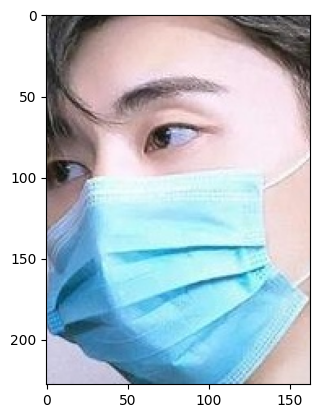

In [13]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

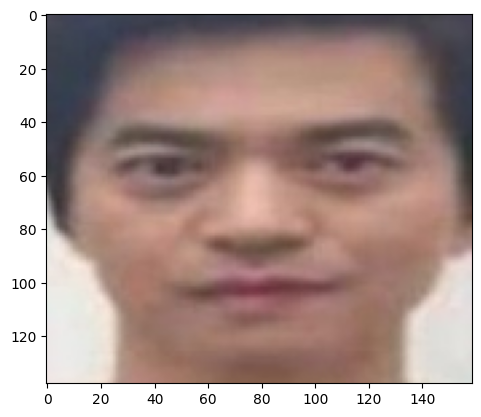

In [14]:
img = mpimg.imread('/content/data/without_mask/without_mask_1569.jpg')
imgplot = plt.imshow(img)
plt.show()

In [15]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((150,150))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((150,150))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
print(len(data))

7553


In [17]:
print(len(with_mask_labels)+len(without_mask_labels))

7553


In [18]:
X=np.array(data)
y=np.array(with_mask_labels+without_mask_labels)

In [19]:
print(X.shape)
print(y.shape)

(7553, 150, 150, 3)
(7553,)


**Spiltting into train and test**

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
print( X_train.shape, X_test.shape,y_test.shape,y_train.shape)

(6042, 150, 150, 3) (1511, 150, 150, 3) (1511,) (6042,)


In [22]:
x_train_scaled=X_train/255
x_test_scaled=X_test/255


In [23]:
print(x_test_scaled.shape)
print(x_train_scaled.shape)

(1511, 150, 150, 3)
(6042, 150, 150, 3)


In [24]:
print(x_train_scaled[0])

[[[0.51372549 0.25490196 0.35294118]
  [0.38823529 0.16078431 0.25490196]
  [0.3372549  0.15294118 0.23529412]
  ...
  [0.41568627 0.34117647 0.34901961]
  [0.74509804 0.6745098  0.66666667]
  [0.85490196 0.78431373 0.76470588]]

 [[0.50196078 0.25098039 0.34509804]
  [0.38431373 0.16470588 0.25882353]
  [0.34117647 0.16470588 0.24705882]
  ...
  [0.45098039 0.37647059 0.38431373]
  [0.77647059 0.70588235 0.69803922]
  [0.84313725 0.77254902 0.75294118]]

 [[0.4627451  0.23137255 0.32156863]
  [0.36078431 0.16078431 0.24705882]
  [0.33333333 0.18039216 0.25490196]
  ...
  [0.49803922 0.42352941 0.43137255]
  [0.83137255 0.76078431 0.75294118]
  [0.81568627 0.74509804 0.7254902 ]]

 ...

 [[0.45490196 0.28235294 0.33333333]
  [0.48235294 0.30588235 0.36078431]
  [0.51764706 0.3372549  0.38431373]
  ...
  [0.37254902 0.35686275 0.49803922]
  [0.35686275 0.34117647 0.48235294]
  [0.36862745 0.35294118 0.49411765]]

 [[0.47058824 0.29803922 0.35686275]
  [0.42352941 0.24705882 0.30588235]


In [25]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=8)

Epoch 1/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7497 - loss: 0.4880 - val_accuracy: 0.8810 - val_loss: 0.2555
Epoch 2/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8963 - loss: 0.2616 - val_accuracy: 0.9140 - val_loss: 0.2229
Epoch 3/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9185 - loss: 0.2017 - val_accuracy: 0.9289 - val_loss: 0.1973
Epoch 4/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9378 - loss: 0.1667 - val_accuracy: 0.9157 - val_loss: 0.2030
Epoch 5/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9569 - loss: 0.1245 - val_accuracy: 0.9455 - val_loss: 0.1929
Epoch 6/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9666 - loss: 0.0937 - val_accuracy: 0.9355 - val_loss: 0.2032
Epoch 7/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9756 - loss: 0.0668 - val_accuracy: 0.9554 - val_loss: 0.1960
Epoch 8/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9698 - loss: 0.0816 - val_accuracy: 0

In [39]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9539 - loss: 0.2109
Test Accuracy = 0.9523494243621826


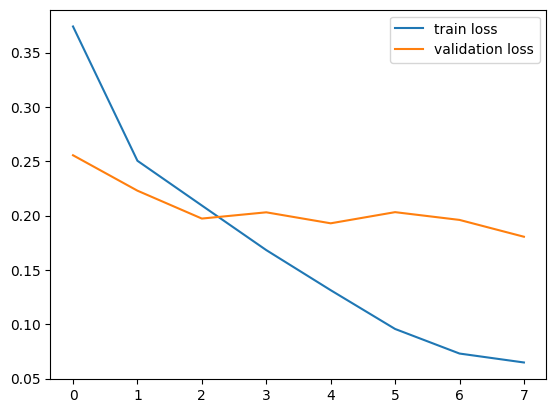

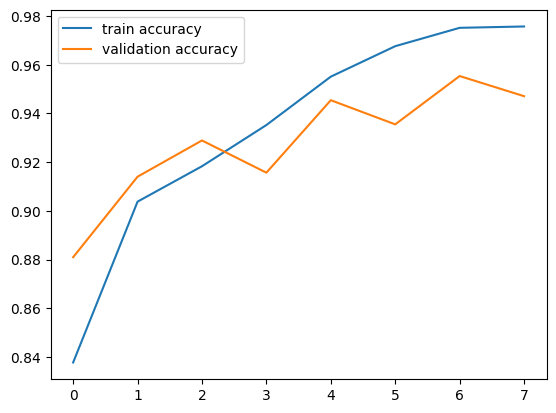

In [55]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [60]:
!pip install keras

In [61]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from keras.optimizers import Adam
from keras.preprocessing import image
import cv2
import datetime

In [72]:
# Assuming 'model' is your trained model
model.save("cnn-model.keras")


In [73]:



model = load_model("cnn-model.keras")


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 26 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [74]:
def preprocess():
  input_image_path = input('Path of the image to be predicted: ')

  input_image = cv2.imread(input_image_path)

  cv2_imshow(input_image)

  input_image_resized = cv2.resize(input_image, (150,150))

  input_image_scaled = input_image_resized/255

  input_image_reshaped = np.reshape(input_image_scaled, [1,150,150,3])

  return input_image_reshaped

In [78]:
def read():
  input_image_reshaped = preprocess()
  input_prediction = model.predict(input_image_reshaped)

  print(input_prediction.shape)




  print(input_prediction)

  input_pred_label = input_prediction[0][0]

  print(input_pred_label)
  if input_pred_label >= 0.5:

   print('The person in the image is wearing a mask')

  else:

   print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/with2.jpg


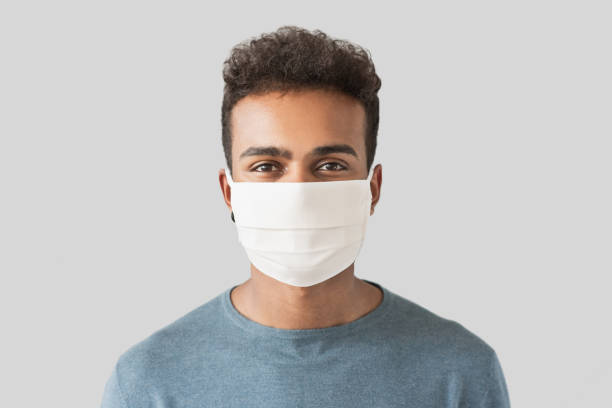

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
(1, 1)
[[0.5727613]]
0.5727613
The person in the image is wearing a mask


In [79]:
read()

Path of the image to be predicted: /content/without.jpeg


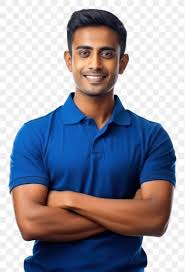

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
(1, 1)
[[0.03895826]]
0.03895826
The person in the image is not wearing a mask


In [80]:
read()

In [84]:
#Done.....!